In [1]:
import torch
import matplotlib.pyplot as plt

0.12813931703567505


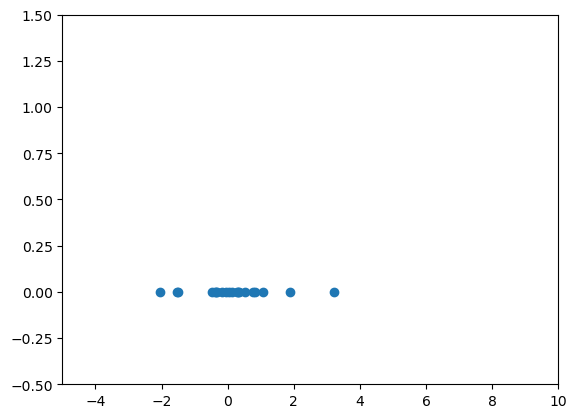

In [70]:
d = torch.distributions.Normal(0, 1)
s = d.sample([20])

import math
lf_mu = lambda mu, x: (-0.5 * (x - mu).square()).exp() / (2 * math.pi)**0.5
lf_sigma = lambda sigma, x: (-0.5 * (x / sigma).square()).exp() / (sigma * (2 * math.pi)**0.5)

lr = 0.001

mu_v = torch.tensor([5.0], requires_grad=True)
for _ in range(1000):
    loss = -lf_mu(mu_v, s).log().sum()
    loss.backward()
    mu_v.data = mu_v.data - lr * mu_v.grad
    mu_v.grad.zero_()

print(mu_v.item())

plt.scatter(s, torch.zeros_like(s))
plt.xlim(-5, 10)
plt.ylim(-0.5, 1.5)
plt.show()

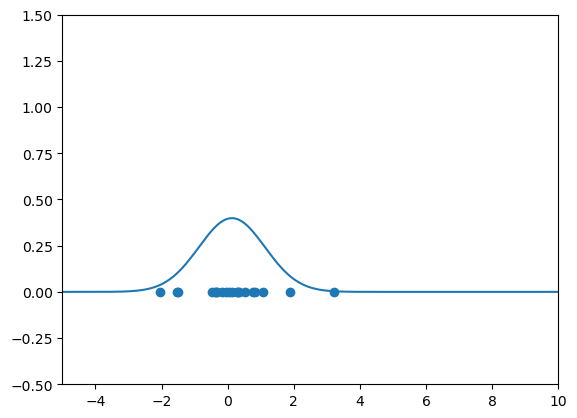

In [71]:
plt.scatter(s, torch.zeros_like(s))
sx = torch.linspace(-5, 10, 501)
sy = lf_mu(mu_v.item(), sx)
plt.plot(sx, sy)
plt.xlim(-5, 10)
plt.ylim(-0.5, 1.5)
plt.show()

0.5744194984436035


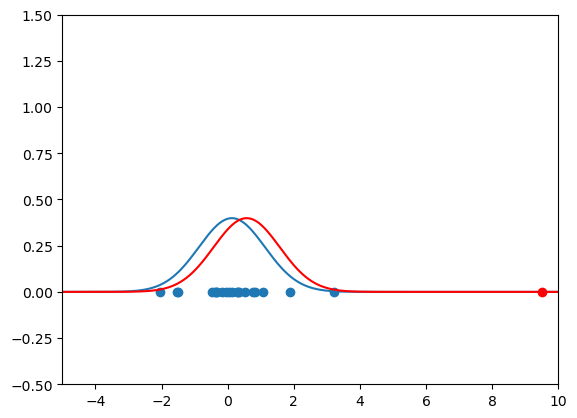

In [72]:
plt.scatter(s, torch.zeros_like(s))
sx = torch.linspace(-5, 10, 501)
sy = lf_mu(mu_v.item(), sx)
plt.plot(sx, sy)


os = torch.cat([s, torch.tensor([9.5])])
plt.scatter([9.5], [0], color='r')

mu_v = torch.tensor([5.0], requires_grad=True)
for _ in range(1000):
    loss = -lf_mu(mu_v, os).log().sum()
    loss.backward()
    mu_v.data = mu_v.data - lr * mu_v.grad
    mu_v.grad.zero_()

print(mu_v.item())

sx = torch.linspace(-5, 10, 501)
sy = lf_mu(mu_v.item(), sx)
plt.plot(sx, sy, color='r')
plt.xlim(-5, 10)
plt.ylim(-0.5, 1.5)
plt.show()

1.142378568649292


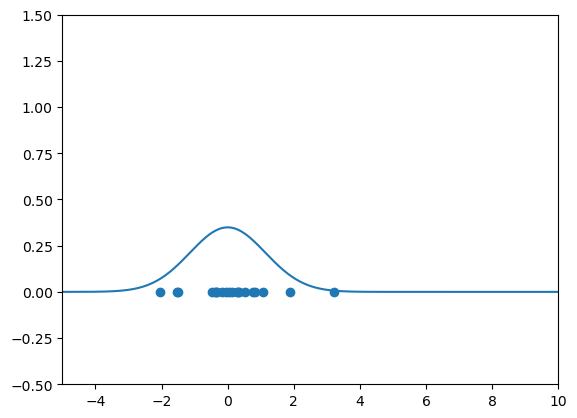

In [73]:
lr = 0.001

sigma_v = torch.tensor([5.0], requires_grad=True)
for _ in range(5000):
    loss = -lf_sigma(sigma_v, s).log().sum()
    loss.backward()
    sigma_v.data = sigma_v.data - lr * sigma_v.grad
    sigma_v.grad.zero_()

print(sigma_v.item())

plt.scatter(s, torch.zeros_like(s))
sx = torch.linspace(-5, 10, 501)
sy = lf_sigma(sigma_v.item(), sx)
plt.plot(sx, sy)
plt.xlim(-5, 10)
plt.ylim(-0.5, 1.5)
plt.show()

2.4192585945129395


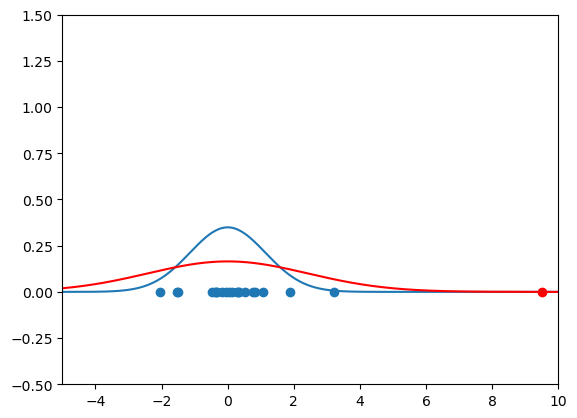

In [74]:
plt.scatter(s, torch.zeros_like(s))
sx = torch.linspace(-5, 10, 501)
sy = lf_sigma(sigma_v.item(), sx)
plt.plot(sx, sy)


os = torch.cat([s, torch.tensor([9.5])])
plt.scatter([9.5], [0], color='r')

sigma_v = torch.tensor([5.0], requires_grad=True)
for _ in range(1000):
    loss = -lf_sigma(sigma_v, os).log().sum()
    loss.backward()
    sigma_v.data = sigma_v.data - lr * sigma_v.grad
    sigma_v.grad.zero_()

print(sigma_v.item())

sx = torch.linspace(-5, 10, 501)
sy = lf_sigma(sigma_v.item(), sx)
plt.plot(sx, sy, color='r')
plt.xlim(-5, 10)
plt.ylim(-0.5, 1.5)
plt.show()